# Feature Scaling

Training a Supervised Machine Learning model involves feeding forward data from a training dataset, through the model, generating predictions. These predictions are then compared with what is known as the *_ground truth_*, or the corresponding targets for the training data. Subsequently, the model is improved, by minimizing a cost, error or [loss function](https://www.machinecurve.com/index.php/2019/10/04/about-loss-and-loss-functions/).

It is important to prepare your dataset before feeding it to your model. When you pass through data without doing so, the model may show some very interesting behavior - and training can become really difficult, if not impossible. In those cases, when inspecting your model code, it could very well be the case that you forgot to apply **normalization** or **standardization**. What are they? Why are they necessary? And how do they work? Precisely that is what we will look at in this article.

Firstly, we will take a look at why you need a normalized or standardized dataset. Subsequently, we'll move forward and see how those techniques actually work. Finally, we give a lot of step-by-step examples by using Scikit-learn and Python for making your dataset ready for Machine Learning models.

Let's take a look! :)



## Normalization and Standardization for Feature Scaling
------

Before studying the _what_ of something, I always think that it helps studying the _why_ first. At least, it makes you understand why you have to apply certain techniques or methods. The same is true for Normalization and Standardization. Why are they necessary? Let's take a look at this in more detail.
<br>
<br>

### They are required by Machine Learning algorithms

When you are training a Supervised Machine Learning model, you are feeding forward data through the model, generating predictions, and subsequently improving the model. As you read in the introduction, this is achieved by minimizing a cost/error/loss function, and it allows us to optimize models in their unique ways.

For example, a [Support Vector Machine](https://www.machinecurve.com/index.php/2019/09/20/intuitively-understanding-svm-and-svr/) is optimized by finding support vectors that support the decision boundary with the greatest margin between two classes, effectively computing a distance metric. Neural networks use [gradient descent](https://www.machinecurve.com/index.php/2019/10/24/gradient-descent-and-its-variants/) for optimization, which involves walking down the loss landscape into the direction where loss improves most. And there are many other ways. Now, here are some insights about why datasets must be scaled for Machine Learning algorithms (Wikipedia, 2011):

- Gradient descent converges much faster when the dataset is scaled.
- If the model depends on measuring distance (think SVM), the distances are comparable after the dataset was scaled. In fact, if it is _not_ scaled, computation of the loss can be "governed by this particular feature" if the feature has a really big scale compared to other features (Wikipedia, 2011).
- If you apply [regularization](https://www.machinecurve.com/index.php/2020/01/26/which-regularizer-do-i-need-for-training-my-neural-network/), you must also apply scaling, because otherwise some features may be penalized more than strictly necessary.
<br>
<br>

There are two primary ways for feature scaling which we will cover in the remainder of this article:

- **Rescaling**, or _min-max normalization:_ we scale the data into one of two ranges: \[latex\]\[0, 1\]\[/latex\] or \[latex\]\[a, b\]\[/latex\], often \[latex\]\[-1, 1\]\[/latex\].
- **Standardization**, or _Z-score normalization_: we scale the data so that the mean is zero and variance is 1.

Let's now cover each of the three methods in more detail, find out how they work, and identify when they are used best.

<br>
<br>




## Rescaling (min-max normalization)
--- 
Rescaling, or **min-max normalization**, is a simple method for bringing your data into one out of two ranges: \[latex\]\[0, 1\]\[/latex\] or \[latex\]\[a, b\]\[/latex\]. It highly involves the minimum and maximum values from the dataset in normalizing the data.

### How it works - the \[0, 1\] way


In [3]:
import numpy as np
dataset = np.array([1.0, 12.4, 3.9, 10.4])

normalized_dataset = (dataset - min(dataset)) / (max(dataset) - min(dataset))
normalized_dataset

array([0.        , 1.        , 0.25438596, 0.8245614 ])

In [4]:

dataset = np.array([1.0, 12.4, 3.9, 10.4])
normalized_dataset = (dataset - np.min(dataset)) / (np.max(dataset) - np.min(dataset))
print(normalized_dataset)


[0.         1.         0.25438596 0.8245614 ]



## Applying the MinMaxScaler from Scikit-learn
---

Scikit-learn, the popular machine learning library used frequently for training many _traditional_ Machine Learning algorithms provides a module called `MinMaxScaler`, and it is part of the `sklearn.preprocessing` API.

It allows us to fit a scaler with a predefined range to our dataset, and subsequently perform a transformation for the data. The code below gives an example of how to use it.

- We import `numpy` as a whole and the `MinMaxScaler` from `sklearn.preprocessing`.
- We define the NumPy array that we just defined before, but now, we have to reshape it: `.reshape(-1, 1)`. This is a Scikit-learn requirement for arrays with just one feature per array item (which in our case is true, because we are using scalar values).
- We then initialize the `MinMaxScaler` and here we also specify our \[latex\]\[a, b\]\[/latex\] range: `feature_range=(0, 1.5)`. Of course, as \[latex\]\[0, 1\]\[/latex\] is also an \[latex\]\[a, b\]\[/latex\] range, we can implement that one as well using `MinMaxScaler`.
- We then fit the data to our scaler, using `scaler.fit(dataset)`. This way, it becomes capable of transforming datasets.
- We finally transform the `dataset` using `scaler.transform(dataset)` and print the result.



In [20]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
dataset = np.array([1.0, 12.4, 3.9, 10.4]).reshape(-1, 1)
scaler = MinMaxScaler()
normalized_dataset =  scaler.fit_transform(dataset)
print(normalized_dataset)


[[0.        ]
 [1.        ]
 [0.25438596]
 [0.8245614 ]]


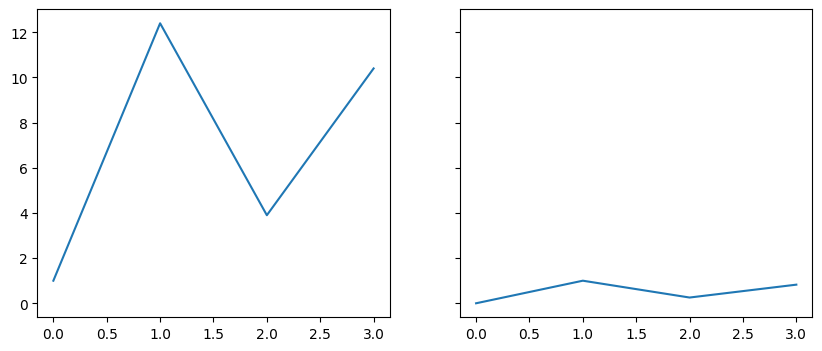

In [23]:
f, (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize = (10,4))
ax1.plot(dataset)
ax2.plot(normalized_dataset)


## Standardization (Z-scale normalization)



```python
import numpy as np
from sklearn.preprocessing import MinMaxScaler
dataset = np.array([2.4, 6.2, 1.8, 9.0]).reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1.5))
scaler.fit(dataset)
normalized_dataset = scaler.transform(dataset)
print(normalized_dataset)
print(np.mean(normalized_dataset))
print(np.std(normalized_dataset))

[[0.125     ]
 [0.91666667]
 [0. ]
 [1.5       ]]
0.6354166666666665
0.6105090942538584
```

This is where **standardization** or _Z-score normalization_ comes into the picture. Rather than using the minimum and maximum values, we use the mean and standard deviation from the data. By consequence, all our features will now have zero mean and unit variance, meaning that we can now compare the variances between the features.

### How it works

The formula for standardization is as follows:

```python
standardized_dataset = (dataset - mean(dataset)) / standard_deviation(dataset))
```

In other words, for each sample from the dataset, we subtract the mean and divide by the standard deviation. By removing the mean from each sample, we effectively move the samples towards a mean of 0 (after all, we removed it from all samples). In addition, by dividing by the standard deviation, we yield a dataset where the values describe _by how much of the standard deviation_ they are offset from the mean.

### Python example


In [8]:
dataset = np.array([1.0, 2.0, 3.0, 3.0, 3.0, 2.0, 1.0])
standardized_dataset = (dataset - np.average(dataset)) / (np.std(dataset))
print(standardized_dataset)


[-1.37198868 -0.17149859  1.02899151  1.02899151  1.02899151 -0.17149859
 -1.37198868]




In Scikit-learn, the `sklearn.preprocessing` module provides the `StandardScaler` which helps us perform the same action in an efficient way.


In [9]:
import numpy as np
from sklearn.preprocessing import StandardScaler
dataset = np.array([1.0, 2.0, 3.0, 3.0, 3.0, 2.0, 1.0]).reshape(-1, 1)
scaler = StandardScaler()
scaler.fit(dataset)
standardized_dataset = scaler.transform(dataset)
print(standardized_dataset)
print(np.mean(standardized_dataset))
print(np.std(standardized_dataset))


[[-1.37198868]
 [-0.17149859]
 [ 1.02899151]
 [ 1.02899151]
 [ 1.02899151]
 [-0.17149859]
 [-1.37198868]]
3.172065784643304e-17
1.0



## Normalization vs Standardization: when to use which one?

Many people have the question **when to use normalization, and when to use standardization?** This is a valid question - and I had it as well.

Most generally, the rule of thumb would be to **use min-max normalization if you want to normalize the data while keeping some differences in scales (because units remain different), and use standardization if you want to make scales comparable (through standard deviations)**.

The example below illustrates the effects of standardization. In it, we create Gaussian data, stretch one of the axes with some value to make them relatively incomparable, and plot the data. This clearly indicates the stretched blobs in an absolute sense. Then, we use standardization and plot the data again. We now see that both the mean has moved to \[latex\](0, 0)\[/latex\] _and_ that when the data is standardized, the variance of the axes is pretty similar!

If we hadn't applied feature scaling here, algorithms like [PCA](https://www.machinecurve.com/index.php/2020/12/07/introducing-pca-with-python-and-scikit-learn-for-machine-learning/) would have pretty much fooled us. ;-)




In [13]:

import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles
from sklearn.preprocessing import StandardScaler


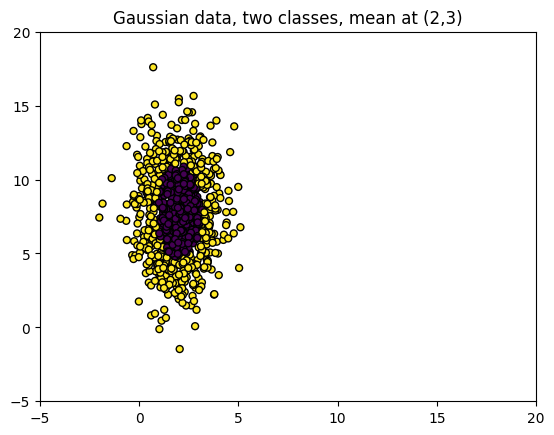

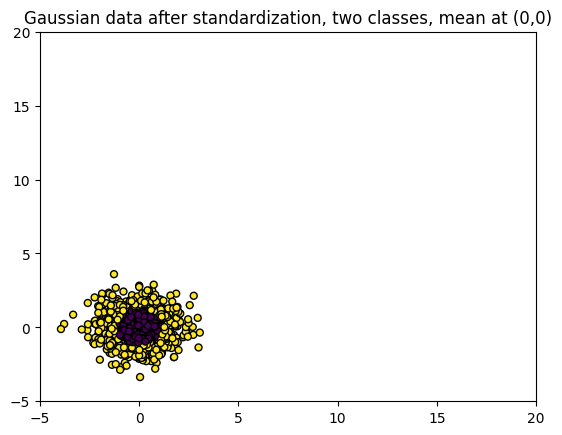

In [14]:

# Make Gaussian data
plt.title("Gaussian data, two classes, mean at (2,3)")
X1, Y1 = make_gaussian_quantiles(n_features=2, n_classes=2, n_samples=1000, mean=(2,3))

# Stretch one of the axes
X1[:, 1] = 2.63 * X1[:, 1]

# Plot data
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')
axes = plt.gca()
axes.set_xlim([-5, 20])
axes.set_ylim([-5, 20])
plt.show()

# Standardize Gaussian data
scaler = StandardScaler()
scaler.fit(X1)
X1 = scaler.transform(X1)

# Plot standardized data
plt.title("Gaussian data after standardization, two classes, mean at (0,0)")
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')
axes = plt.gca()
axes.set_xlim([-5, 20])
axes.set_ylim([-5, 20])
plt.show()



## Key Takeaways

- __Normalization__ (min-max normalization) scales the dataset between (0,1). 
- __Standardization__, which allows us to convert the scales into _amounts of standard deviation_, making the axes comparable for e.g. algorithms like PCA.

## References

Wikipedia. (2011, December 15). _Feature scaling_. Wikipedia, the free encyclopedia. Retrieved November 18, 2020, from [https://en.wikipedia.org/wiki/Feature\_scaling](https://en.wikipedia.org/wiki/Feature_scaling)

Scikit-learn. (n.d.). _Importance of feature scaling — scikit-learn 0.23.2 documentation_. scikit-learn: machine learning in Python — scikit-learn 0.16.1 documentation. Retrieved November 18, 2020, from [https://scikit-learn.org/stable/auto\_examples/preprocessing/plot\_scaling\_importance.html](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)

Wikipedia. (n.d.). _Curse of dimensionality_. Wikipedia, the free encyclopedia. Retrieved November 18, 2020, from [https://en.wikipedia.org/wiki/Curse\_of\_dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)

Wikipedia. (2001, June 30). _Variance_. Wikipedia, the free encyclopedia. Retrieved November 18, 2020, from [https://en.wikipedia.org/wiki/Variance](https://en.wikipedia.org/wiki/Variance)
